# Лабораторная №1 - Бинарная классификация фактографических данных


## Методические указания


Основной библиотекой, которую рекомендуется использовать в данном курсе работ, является библиотека scikit-learn (http://scikit-learn.org). Библиотека scikit-learn предоставляет реализацию целого ряда алгоритмов для обучения с учителем (Supervised Learning) и обучения без учителя (Unsupervised Learning) через интерфейс для языка программирования Python.

В данной работе нам потребуются следующие модули:
* [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* [metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
* [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html )
* [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html )
* [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html )
* [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html )

А также, в зависимости от варианта задания – один из модулей встроенных генераторов датасетов – 
* [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html )
* [make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html )
* [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification )

Кроме того, в работе будет использоваться библиотека NumPy http://www.numpy.org, позволяющая работать с многомерными массивами и высокоуровневыми математическими функциями.
Программный код для импорта указанных модулей может выглядеть следующим образом: 


## Импортируем требуемые модули

In [19]:
# библиотека для работы с массивами
import numpy as np 

# Требуемые модули из sklearn
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


Для построения графиков рекомендуется использовать библиотеку matplotlib и ее модуль [pyplot](https://matplotlib.org/users/pyplot_tutorial)


In [3]:
import matplotlib.pyplot as plt


А для отображения на графике области принятия решения - готовую функцию `plot_2d_separator`, которой нужно передать на вход объект `classifier` – модель классификатора и `X` – массив входных данных:


In [5]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())


## Генерация и знакомство с выборкой

Сгенерируем данные, с которыми будем работать. В нашем случае это будут 2 «пузыря» (blob). 

Передадим в качестве параметров:
* `centers = 2` – количество классов-пузырей, 
* `random_state = 66` – основа, используемая для генерации случайных чисел,  
* `cluster_std  = 4` – стандартное отклонение кластеров,
* `shuffle = 1` – перемешиваем объекты внутри выборки.

В массив с именем `Х` сохраним координаты каждого объекта выборки, а в массив `у` – метки классов


In [7]:
X, y = make_blobs(centers = 2 , random_state = 66, cluster_std  = 4, shuffle = 1)

Посмотрим, что из себя представляют массивы Х и у. Выведем первые 15 элементов каждого из массивов

In [8]:
print ("Координаты точек: ") 
print (X[:15])
print ("Метки класса: ") 
print (y[:15])


Координаты точек: 
[[-14.80437794  -7.18377798]
 [ -2.60632729   0.20074702]
 [ -7.67410393  -0.92722787]
 [-18.73964269  -1.88968606]
 [ -3.7511755    3.11333437]
 [ -6.13559977  -8.39517379]
 [ -8.10457133   6.15227722]
 [  4.91341461  -2.95516942]
 [ -2.86156125  10.56078045]
 [  0.52303829   3.14548666]
 [  3.53563356   5.80649298]
 [ -6.05018557  -2.10920558]
 [  0.8102374    1.86943425]
 [ -8.0759995   -0.91582206]
 [ -9.37948058 -10.35367349]]
Метки класса: 
[0 1 0 0 1 0 1 0 1 1 1 0 1 1 0]


Первый элемент выборки с координатами `[-14.80437794  -7.18377798]` относится к классу 0, 
второй элемент  `[ -2.60632729   0.20074702]` – к классу 1, третий `[ -7.67410393  -0.92722787]` - к классу 0 и т.д.

Отобразим на графике сгенерированные данные. 
В качестве координат точек передадим первый и второй столбец массива `Х`, а для указания цвета точки (параметр `с`) используем метку класса из массива `у`


<function matplotlib.pyplot.show(*args, **kw)>

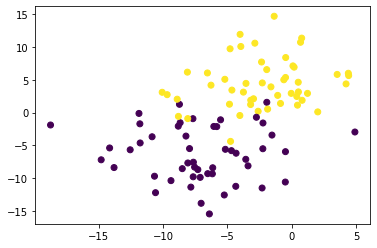

In [9]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show


Видно, что объекты двух классов пересекаются между собой.

## Разбиение на тестовое и обучающее множества

Разобьем выборку на обучающее и тестовое множества, используя функцию **train_test_split**. 

В качестве аргументов передаем массив `Х`, массив `у`.
`test_size = 0.25`  означает, что на тестовую часть пойдет 25% всей выборки, соответственно, на обучающую – 75%, 

Также указываем, что разбиение будет случайным, но воспроизводимым: `random_state = 1`. Если параметр `random_state = None`, то разбиение будет невоспроизводимым.

Функция `train_test_split` записывает результаты разбиения в 4 переменные. Назовем их `X_train, X_test, y_train, y_test`. В первую и вторую переменную будут записаны координаты объектов из обучающей и тестовой выборки соответственно, а в третью и четвертую – метки классов объектов из обучающей и тестовой выборки соответственно.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

Таким образом, в переменной `X_train` лежат координаты, а в `y_train` – метки классов соответствующих объектов из обучающей выборки. Эти переменные будут использоваться в дальнейшем для обучения модели. 

`X_test, y_test` – соответственно координаты и метки классов объектов тестовой выборки. Эти переменные мы будем использовать для оценки точности модели


## Обучение модели и классификация

Для обучения модели и последующей классификации с использованием модулей библиотеки scikit-learn используется довольно стандартная процедура. Разберем на примере обучение и классификацию данных методом к-ближайших соседей. Требуемый модуль мы уже загрузили в блоке импорта. 


 
### 1. Создать переменную - модель классификатора, указав при необходимости параметры классификации. 

В нашем случае мы задаем два параметра – количество ближайших соседей = 1 и евклидову метрику.

In [12]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

Для большинства классификаторов, если не задавать никаких параметров, они будут выбраны по умолчанию. Список доступных параметров можно посмотреть в документации, в нашем случае:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

Посмотреть доступные метрики расстояний также можно в документации на DistanceMetric:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

### 2. Обучить модель
используя для этого метод `fit()`, передав в него координаты объектов и метки классов обучающей выборки

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

### 3. Проверить модель на тестовой выборке
используя метод `predict()`


In [14]:
prediction = knn.predict(X_test)

Стоит отметить, что в метод `predict()` подаются только координаты объектов (`X_test`) без истинных меток класса (`y_test`). 

В общем случае, когда модель полностью настроена, в данный метод могут передаваться «боевые» данные – объекты, которые нужно проклассифицировать.

В нашем случае, в переменную `prediction` метод вернул предсказанные метки классов для каждого объекта из переменной `X_test`. 


### 4. Оценка качества модели

Зная истинные метки классов (переменная `y_test`) мы можем оценить, насколько точно работает наша модель.
Самое простое – вывести на экран истинные и предсказанные ответы:


In [15]:
print ('Prediction and test: ')
print (prediction)
print (y_test)


Prediction and test: 
[1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1]
[1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1]


Кроме того, можно оценить матрицу неточностей (**confusion matrix**) используя функцию `confusion_matrix`, и передав в нее истинные и предсказанные ответы:

In [16]:
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))


Confusion matrix: 
[[ 9  3]
 [ 0 13]]


Для оценки аккуратности классификации можно использовать функцию `accuracy_score`:

In [17]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.88


Для оценки показателей полноты-точности и f1-меры воспользуемся функцией `classification_report`:

In [18]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.81      1.00      0.90        13

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



Оценить показатель AUC ROC можно следующим образом:

In [20]:
roc_auc_score(y_test, prediction)

0.875

Кроме того, воспользовавшись функцией `plot_2d_separator`, описанной выше, можно наглядно отобразить на графике область принятия решений по каждому классу:

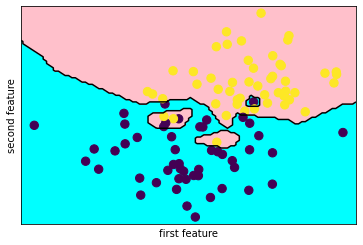

In [21]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)


Обычно, для адекватной проверки качества модели, все исследования, начиная с разбиения на тестовое и обучающее множество, проводят несколько раз (3,5,..), по разному разбивая выборку (устанавляивая разные значения `random_state`), заново обучая модель и проверяя ее на тестовом множестве. 

При этом, на каждой итерации будут получаться разные значения всех метрик, что связано как раз с разным разбиением на обучающее и тестовое множество. Итоговая оценка качества находится как среднее по всем итерациям.